<a href="https://colab.research.google.com/github/NasreddineG/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚀 Arbitrage Statistique des Cryptomonnaies 🚀**




**Nasreddine GRIHMA**

# **Introduction**

L'objectif de ce projet est d'étudier les variations de prix de certaines cryptos lors d'une Altcoin Seasons aussi appelé Alt Seasons. Grâce à cette étude, je pourrais savoir quelles cryptos sont les plus corrélées à bitcoin et celles qui le sont moins. Ainsi par défintion, je pourrais savoir les cryptos les plus intérressantes à avoir lors d'une Alt Seasons. Une Alt Season est une période durant laquelle les cryptos hors Bitcoin (Altcoins) superforment le Bitcoin.

Pour ce faire, j'ai décidé d'étudier des cryptos qui existent depuis le précédent bull run de 2017-2018 pour pouvoir étudier leurs évolutions sur plusieurs AltSeasons. Ainsi j'ai décidé de sélectionner 6 cryptos qui existent depuis au moins 2017 et qui sont actuellement (fin décembre 2021) dans le top 20 des cryptos les plus capitalisées.
*   Bitcoin (BTC)
*   Ethereum (ETH)
*   Ripple (XRP)
*   Dogecoin (DOGE)
*   Cardano (ADA)
*   Litecoin (LTC)

Grâce à l'indicateur Bitcoin Dominance, j'ai pu identifier 4 Alt Seasons pour pouvoir analyser les performances de ces 6 cryptos. Cette indicateur permmet de montrer le pourcentage de superformance ou non des Alts par rapport à celle de bitcoin. Par exemple -10% sur la Bitcoin Dominance signifie que les Alts ont eu une performance 10% de fois supérieur à celle de BTC.

Pour avoir une étude assez complète, j'ai décidé de prendre des AltSeasons de quelques jours sur chaque année depuis l'ancien bull run (2018) durant lesquelles le prix du bitcoin a faiblement augmenté ou baissé contrairement à celle des Alts qui ont fortement augmenté.
*   AltSeason1: 20-21 Septembre 2018 => BTC ~ 6.97% & BTCD ~  -13.98%
*   AltSeason2: 14-15 Mai 2019 => BTC ~ 4.86% & BTCD ~  -6.30%
*   AltSeason3: 20-23 Novembre 2020 => BTC ~ 1.37% & BTCD ~  -7.53%
*   AltSeason4: 3-4 Janvier 2021 => BTC ~  -1.92% & BTCD ~  -8.118%




In [ ]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import statistics

# **Data**

N'ayant trouvé aucune données intéressantes, j'ai décidé de fair mes propres data pour les besoins du projet. J'ai utilisé l'API de coingeko pour avoir le prix, la market cap et le volume durant la période spuhaitée.

Une fois le dataframe crée, je le télécharge en CSV. Pour les besoins de ce projet, je décide d'utiliser les données sur l'évolution du prix et de la marketcap cap lors des AltSeasons.

In [ ]:
baseURL1 = "https://api.coingecko.com/api/v3/coins/"
finURL1 = "/market_chart/range?vs_currency=usd&from=1537398608&to=1537575008"

#URL pour la 2ème AltSeason avec des timestamp différent
#finURL2 = "/market_chart/range?vs_currency=usd&from=1557791062&to=1557967462"

#URL pour la 3ème AltSeason avec des timestamp différent
#finURL3 = "/market_chart/range?vs_currency=usd&from=1605829462&to=1606176502"

#URL pour la 4ème AltSeason avec des timestamp différent
#finURL4 = "/market_chart/range?vs_currency=usd&from=1609631062&to=1609807462"

url1 = baseURL1 +  "bitcoin" + finURL1
response = requests.get(url1)
data = response.json()
listPrice = []
listDate = []
listMC = []
listVol = []

for d in data['prices']:
  tp= [d][0][0]
  dt = datetime.fromtimestamp(int(tp)/1000) # pour convertir un timestamp en date
  listDate.append(dt)

for p in data['prices']:
  price =[p][0][1]
  listPrice.append(price)

for mc in data['market_caps']:
  marketcap =[mc][0][1]
  listMC.append(marketcap)

for v in data['total_volumes']:
  vol=[v][0][1]
  listVol.append(vol)

df = pd.DataFrame({'Date':listDate, 'Price':listPrice, 'Market cap':listMC, 'Volume':listVol })

#df.drop(df.index[0:5],0,inplace=True)
#df.drop(df.index[1:54],0,inplace=True)
#df.drop(54,0,inplace=True)
df
#df.to_csv('LTC1.csv')

,Date,Price,Market cap,Volume
0,2018-09-19 23:47:13.741,6382.064632,1.102858e+11,5.403504e+09
1,2018-09-20 00:47:09.422,6420.884789,1.108371e+11,5.417067e+09
2,2018-09-20 01:47:05.599,6407.228164,1.108138e+11,5.102526e+09
3,2018-09-20 02:47:05.335,6388.324236,1.102990e+11,5.367261e+09
4,2018-09-20 03:47:08.097,6397.833394,1.105626e+11,5.311772e+09
5,2018-09-20 04:47:10.767,6397.440314,1.105528e+11,5.168062e+09
6,2018-09-20 05:47:10.772,6395.462530,1.104236e+11,5.457830e+09
7,2018-09-20 06:47:15.217,6397.403826,1.105381e+11,5.343100e+09
8,2018-09-20 07:47:01.656,6406.859427,1.106938e+11,4.995534e+09
9,2018-09-20 08:47:04.951,6396.572002,1.104915e+11,5.340886e+09


In [ ]:
#Transformer les csv téléchargés précedement en dataframe pour les 4 AltSeasons
#Créer un dataframe pour chaque crypto durant la période de l'Alt season étudiée
dfBTC1 = pd.read_csv('BTC1.csv', sep=',')
dfETH1 = pd.read_csv('ETH1.csv', sep=',')
dfXRP1 = pd.read_csv('XRP1.csv', sep=',')
dfDOGE1 = pd.read_csv('DOGE1.csv', sep=',')
dfADA1 = pd.read_csv('ADA1.csv', sep=',')
dfLTC1 = pd.read_csv('LTC1.csv', sep=',')

dfBTC2 = pd.read_csv('BTC2.csv', sep=',')
dfETH2 = pd.read_csv('ETH2.csv', sep=',')
dfXRP2 = pd.read_csv('XRP2.csv', sep=',')
dfDOGE2 = pd.read_csv('DOGE2.csv', sep=',')
dfADA2 = pd.read_csv('ADA2.csv', sep=',')
dfLTC2 = pd.read_csv('LTC2.csv', sep=',')

dfBTC3 = pd.read_csv('BTC3.csv', sep=',')
dfETH3 = pd.read_csv('ETH3.csv', sep=',')
dfXRP3 = pd.read_csv('XRP3.csv', sep=',')
dfDOGE3 = pd.read_csv('DOGE3.csv', sep=',')
dfADA3 = pd.read_csv('ADA3.csv', sep=',')
dfLTC3 = pd.read_csv('LTC3.csv', sep=',')

dfBTC4 = pd.read_csv('BTC4.csv', sep=',')
dfETH4 = pd.read_csv('ETH4.csv', sep=',')
dfXRP4 = pd.read_csv('XRP4.csv', sep=',')
dfDOGE4 = pd.read_csv('DOGE4.csv', sep=',')
dfADA4 = pd.read_csv('ADA4.csv', sep=',')
dfLTC4 = pd.read_csv('LTC4.csv', sep=',')

# **Vérification de la pertinences des AltSeasons choisis**

Dans un premier temps je décide de stocker ces données dans des dataframes représentant chaque AltSeason. Par la suite, je décide d'afficher l'évolution des MarketCap pour voir la pertinence des périodes choisis. En effet, grâce à ce graphique, je vais pouvoir observer l'évolution de la market cap du bitcoin par rapport à celles des Alts pour vérifier leurs superformances par rapport à BTC.

In [ ]:
#Alt Seson1 (20-21 Sept 2018)
listDate1 = list(dfBTC1['Date'])
listMCBTC1 = list(dfBTC1['Market cap'])
listMCETH1 = list(dfETH1['Market cap'])
listMCXRP1 = list(dfXRP1['Market cap'])
listMCDOGE1 = list(dfDOGE1['Market cap'])
listMCADA1 = list(dfADA1['Market cap'])
listMCLTC1 = list(dfLTC1['Market cap'])


listPriceBTC1 = list(dfBTC1['Price'])
listPriceETH1 = list(dfETH1['Price'])
listPriceXRP1 = list(dfXRP1['Price'])
listPriceDOGE1 = list(dfDOGE1['Price'])
listPriceADA1 = list(dfADA1['Price'])
listPriceLTC1 = list(dfLTC1['Price'])

#Alt Seson2 (14-15 Mai 2019)
listDate2 = list(dfBTC2['Date'])
listMCBTC2 = list(dfBTC2['Market cap'])
listMCETH2 = list(dfETH2['Market cap'])
listMCXRP2 = list(dfXRP2['Market cap'])
listMCDOGE2 = list(dfDOGE2['Market cap'])
listMCADA2 = list(dfADA2['Market cap'])
listMCLTC2 = list(dfLTC2['Market cap'])


listPriceBTC2 = list(dfBTC2['Price'])
listPriceETH2 = list(dfETH2['Price'])
listPriceXRP2 = list(dfXRP2['Price'])
listPriceDOGE2 = list(dfDOGE2['Price'])
listPriceADA2 = list(dfADA2['Price'])
listPriceLTC2 = list(dfLTC2['Price'])

#Alt Seson3 (20-23 Nov 2020)
listDate3 = list(dfBTC3['Date'])
listMCBTC3 = list(dfBTC3['Market cap'])
listMCETH3 = list(dfETH3['Market cap'])
listMCXRP3 = list(dfXRP3['Market cap'])
listMCDOGE3 = list(dfDOGE3['Market cap'])
listMCADA3 = list(dfADA3['Market cap'])
listMCLTC3 = list(dfLTC3['Market cap'])


listPriceBTC3 = list(dfBTC3['Price'])
listPriceETH3 = list(dfETH3['Price'])
listPriceXRP3 = list(dfXRP3['Price'])
listPriceDOGE3 = list(dfDOGE3['Price'])
listPriceADA3 = list(dfADA3['Price'])
listPriceLTC3 = list(dfLTC3['Price'])

#Alt Seson4 (3-4 Janv 2021)
listDate4 = list(dfBTC4['Date'])
listMCBTC4 = list(dfBTC4['Market cap'])
listMCETH4 = list(dfETH4['Market cap'])
listMCXRP4 = list(dfXRP4['Market cap'])
listMCDOGE4 = list(dfDOGE4['Market cap'])
listMCADA4 = list(dfADA4['Market cap'])
listMCLTC4 = list(dfLTC4['Market cap'])


listPriceBTC4 = list(dfBTC4['Price'])
listPriceETH4 = list(dfETH4['Price'])
listPriceXRP4 = list(dfXRP4['Price'])
listPriceDOGE4 = list(dfDOGE4['Price'])
listPriceADA4 = list(dfADA4['Price'])
listPriceLTC4 = list(dfLTC4['Price'])

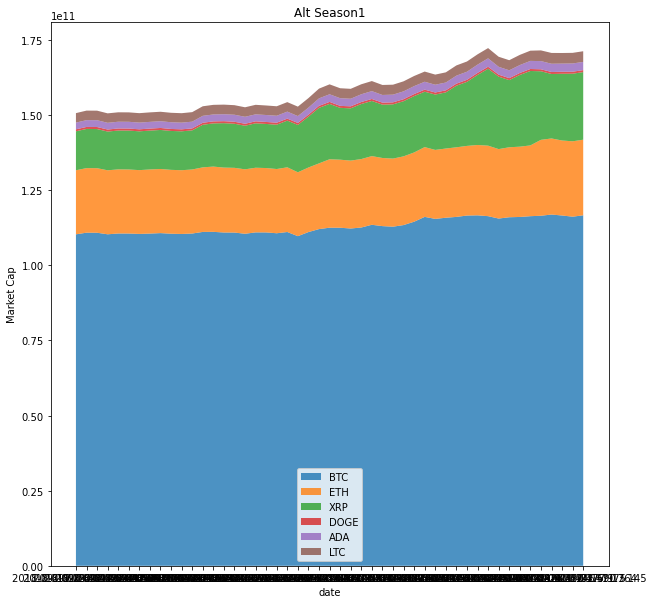

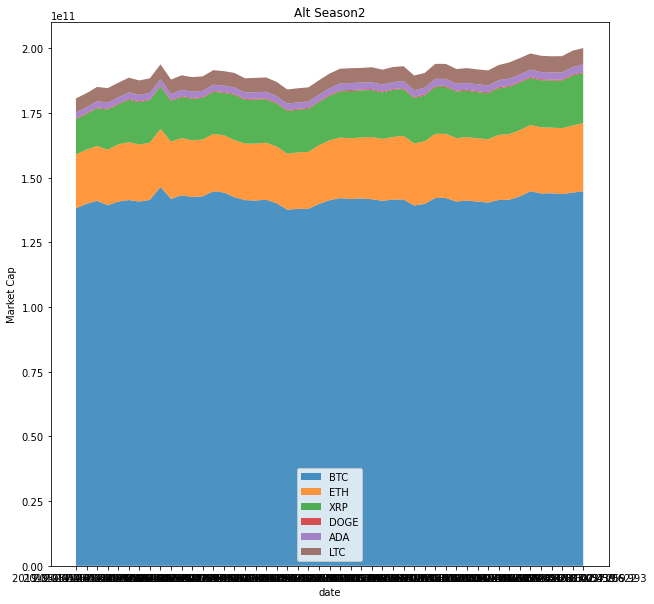

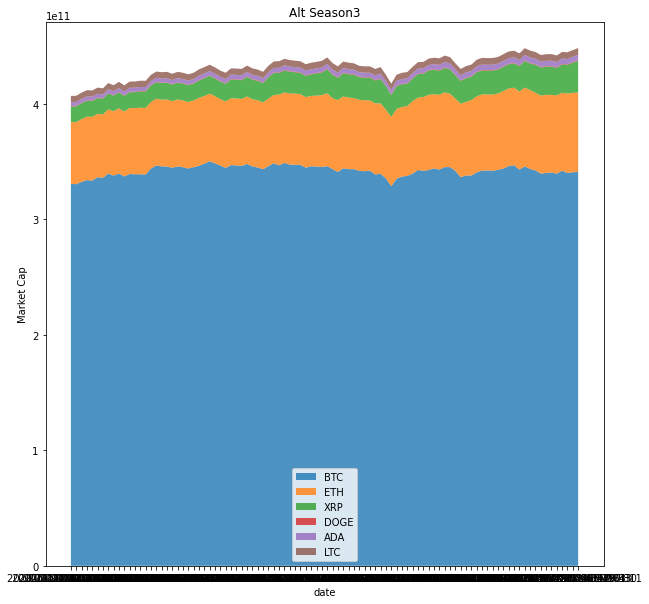

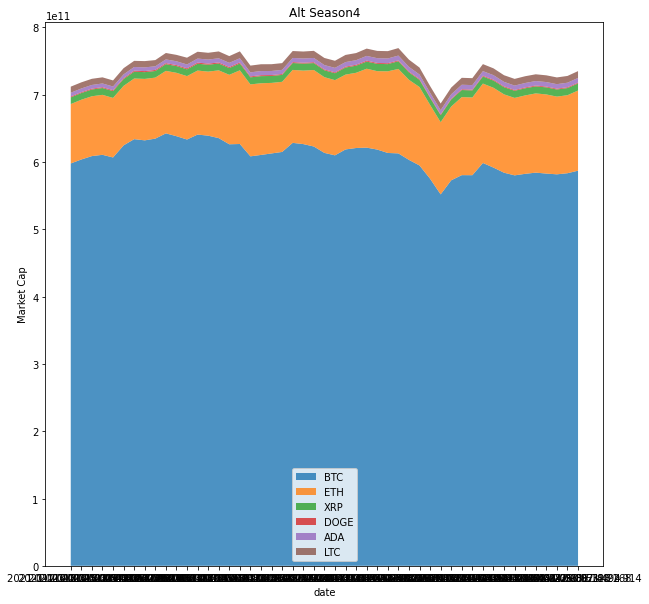

In [16]:
#Afficher l'évolution des Market Cap des différentes crypto durant les 4 périodes d'AltSeasons
#Alt Seson1 (20-21 Sept 2018)
date1 = listDate1
market_cap= {'BTC': listMCBTC1, 'ETH': listMCETH1, 'XRP': listMCXRP1, 'DOGE': listMCDOGE1, 'ADA': listMCADA1, 'LTC': listMCLTC1}

fig, ax = plt.subplots()
ax.stackplot(date1, market_cap.values(), labels=market_cap.keys(), alpha=0.8)
ax.legend(loc='lower center')
ax.set_title('Alt Season1')
ax.set_xlabel('date')
ax.set_ylabel('Market Cap')

plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


print(" ")

#Alt Seson2 (14-15 Mai 2019)
date2 = listDate2
market_cap2= {'BTC': listMCBTC2, 'ETH': listMCETH2, 'XRP': listMCXRP2, 'DOGE': listMCDOGE2, 'ADA': listMCADA2, 'LTC': listMCLTC2}

fig, ax = plt.subplots()
ax.stackplot(date2, market_cap2.values(), labels=market_cap2.keys(), alpha=0.8)
ax.legend(loc='lower center')
ax.set_title('Alt Season2')
ax.set_xlabel('date')
ax.set_ylabel('Market Cap')

plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


print(" ")

#Alt Seson3 (20-23 Nov 2020)
date3 = listDate3
market_cap3= {'BTC': listMCBTC3, 'ETH': listMCETH3, 'XRP': listMCXRP3, 'DOGE': listMCDOGE3, 'ADA': listMCADA3, 'LTC': listMCLTC3}

fig, ax = plt.subplots()
ax.stackplot(date3, market_cap3.values(), labels=market_cap3.keys(), alpha=0.8)
ax.legend(loc='lower center')
ax.set_title('Alt Season3')
ax.set_xlabel('date')
ax.set_ylabel('Market Cap')

plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


print(" ")

#Alt Seson4 (3-4 Janv 2021)
date4 = listDate4
market_cap4= {'BTC': listMCBTC4, 'ETH': listMCETH4, 'XRP': listMCXRP4, 'DOGE': listMCDOGE4, 'ADA': listMCADA4, 'LTC': listMCLTC4}

fig, ax = plt.subplots()
ax.stackplot(date4, market_cap4.values(), labels=market_cap4.keys(), alpha=0.8)
ax.legend(loc='lower center')
ax.set_title('Alt Season4')
ax.set_xlabel('date')
ax.set_ylabel('Market Cap')

plt.rcParams["figure.figsize"] = (10, 10)

plt.show()

On remarque bien que les 4 AltSeasons choisi sont pertinentes. En effet, le Marcket Cap du BTC n'augmente pas énormement contrairement à celles des ALts. De plus, on remarque que la Market Cap total augmente sur les périodes séléctionnées grâce à l'augmentation des Alts et non à bitcoin.

# **K-means**

Après avoir vérifié la pertinence des périodes séléctionnées. J'effectue l'apprentissage non-supervisé du K-Means pour savoir les clusters selon le pourcentage de hausse. Ainsi, je pourais savoir les cryptos les plus intérressantes lors de AltSeason.

In [ ]:
#Création de dataframes pour les pourentags d'évolution des prix et Market Caps des cryptos durant les 4 AltSeasons
#Alt Seson1 (20-21 Sept 2018)
opPriceBTC1= listPriceBTC1[0] #open price on BTC
clPriceBTC1= listPriceBTC1[-1] #close price on BTC
opPriceETH1= listPriceETH1[0] 
clPriceETH1= listPriceETH1[-1]
opPriceXRP1= listPriceXRP1[0] 
clPriceXRP1= listPriceXRP1[-1]
opPriceDOGE1= listPriceDOGE1[0] 
clPriceDOGE1= listPriceDOGE1[-1]
opPriceADA1= listPriceADA1[0] 
clPriceADA1= listPriceADA1[-1]
opPriceLTC1= listPriceLTC1[0] 
clPriceLTC1= listPriceLTC1[-1]

PourcentagePriceBTC1 = ((clPriceBTC1 - opPriceBTC1) / opPriceBTC1) *100
PourcentagePriceETH1 = ((clPriceETH1 - opPriceETH1) / opPriceETH1) *100
PourcentagePriceXRP1 = ((clPriceXRP1 - opPriceXRP1) / opPriceXRP1) *100
PourcentagePriceDOGE1 = ((clPriceDOGE1 - opPriceDOGE1) / opPriceDOGE1) *100
PourcentagePriceADA1 = ((clPriceADA1 - opPriceADA1) / opPriceADA1) *100
PourcentagePriceLTC1 = ((clPriceLTC1 - opPriceLTC1) / opPriceLTC1) *100


opMCBTC1= listMCBTC1[0] #open MC on BTC
clMCBTC1= listMCBTC1[-1] #close MC on BTC
opMCETH1= listMCETH1[0] 
clMCETH1= listMCETH1[-1]
opMCXRP1= listMCXRP1[0] 
clMCXRP1= listMCXRP1[-1]
opMCDOGE1= listMCDOGE1[0] 
clMCDOGE1= listMCDOGE1[-1]
opMCADA1= listMCADA1[0] 
clMCADA1= listMCADA1[-1]
opMCLTC1= listMCLTC1[0] 
clMCLTC1= listMCLTC1[-1]

PourcentageMCBTC1 = ((clMCBTC1 - opMCBTC1) / opMCBTC1) *100
PourcentageMCETH1 = ((clMCETH1 - opMCETH1) / opMCETH1) *100
PourcentageMCXRP1 = ((clMCXRP1 - opMCXRP1) / opMCXRP1) *100
PourcentageMCDOGE1 = ((clMCDOGE1 - opMCDOGE1) / opMCDOGE1) *100
PourcentageMCADA1 = ((clMCADA1 - opMCADA1) / opMCADA1) *100
PourcentageMCLTC1 = ((clMCLTC1 - opMCLTC1) / opMCLTC1) *100

ListName = ['BTC', 'ETH', 'XRP', 'DOGE', 'ADA', 'LTC']
listPourcentagePrice= [PourcentagePriceBTC1,PourcentagePriceETH1,PourcentagePriceXRP1, PourcentagePriceDOGE1, PourcentagePriceADA1, PourcentagePriceLTC1]
listPourcentageMC= [PourcentageMCBTC1, PourcentageMCETH1, PourcentageMCXRP1, PourcentageMCDOGE1, PourcentageMCADA1, PourcentageMCLTC1]

dfPourcentage = pd.DataFrame(list(zip(ListName,listPourcentagePrice,listPourcentageMC)), columns = ['Name', 'Price', 'MC'])

#dfPourcentage.to_csv('Pourcentage1.csv')
#dfPourcentage


#Alt Seson2 (14-15 Mai 2019)
opPriceBTC2= listPriceBTC2[0] #open price on BTC
clPriceBTC2= listPriceBTC2[-1] #close price on BTC
opPriceETH2= listPriceETH2[0] 
clPriceETH2= listPriceETH2[-1]
opPriceXRP2= listPriceXRP2[0] 
clPriceXRP2= listPriceXRP2[-1]
opPriceDOGE2= listPriceDOGE2[0] 
clPriceDOGE2= listPriceDOGE2[-1]
opPriceADA2= listPriceADA2[0] 
clPriceADA2= listPriceADA2[-1]
opPriceLTC2= listPriceLTC2[0] 
clPriceLTC2= listPriceLTC2[-1]

PourcentagePriceBTC2 = ((clPriceBTC2 - opPriceBTC2) / opPriceBTC2) *100
PourcentagePriceETH2 = ((clPriceETH2 - opPriceETH2) / opPriceETH2) *100
PourcentagePriceXRP2 = ((clPriceXRP2 - opPriceXRP2) / opPriceXRP2) *100
PourcentagePriceDOGE2 = ((clPriceDOGE2 - opPriceDOGE2) / opPriceDOGE2) *100
PourcentagePriceADA2 = ((clPriceADA2 - opPriceADA2) / opPriceADA2) *100
PourcentagePriceLTC2 = ((clPriceLTC2 - opPriceLTC2) / opPriceLTC2) *100

opMCBTC2= listMCBTC2[0] #open MC on BTC
clMCBTC2= listMCBTC2[-1] #close MC on BTC
opMCETH2= listMCETH2[0] 
clMCETH2= listMCETH2[-1]
opMCXRP2= listMCXRP2[0] 
clMCXRP2= listMCXRP2[-1]
opMCDOGE2= listMCDOGE2[0] 
clMCDOGE2= listMCDOGE2[-1]
opMCADA2= listMCADA2[0] 
clMCADA2= listMCADA2[-1]
opMCLTC2= listMCLTC2[0] 
clMCLTC2= listMCLTC2[-1]

PourcentageMCBTC2 = ((clMCBTC2 - opMCBTC2) / opMCBTC2) *100
PourcentageMCETH2 = ((clMCETH2 - opMCETH2) / opMCETH2) *100
PourcentageMCXRP2 = ((clMCXRP2 - opMCXRP2) / opMCXRP2) *100
PourcentageMCDOGE2 = ((clMCDOGE2 - opMCDOGE2) / opMCDOGE2) *100
PourcentageMCADA2 = ((clMCADA2 - opMCADA2) / opMCADA2) *100
PourcentageMCLTC2 = ((clMCLTC2 - opMCLTC2) / opMCLTC2) *100

ListName = ['BTC', 'ETH', 'XRP', 'DOGE', 'ADA', 'LTC']
listPourcentagePrice2= [PourcentagePriceBTC2,PourcentagePriceETH2,PourcentagePriceXRP2, PourcentagePriceDOGE2, PourcentagePriceADA2, PourcentagePriceLTC2]
listPourcentageMC2= [PourcentageMCBTC2, PourcentageMCETH2, PourcentageMCXRP2, PourcentageMCDOGE2, PourcentageMCADA2, PourcentageMCLTC2]

dfPourcentage2 = pd.DataFrame(list(zip(ListName,listPourcentagePrice2,listPourcentageMC2)), columns = ['Name', 'Price', 'MC'])

# dfPourcentage2.to_csv('Pourcentage2.csv')
# dfPourcentage2


#Alt Seson3 (20-23 Nov 2020)
opPriceBTC3= listPriceBTC3[0] #open price on BTC
clPriceBTC3= listPriceBTC3[-1] #close price on BTC
opPriceETH3= listPriceETH3[0] 
clPriceETH3= listPriceETH3[-1]
opPriceXRP3= listPriceXRP3[0] 
clPriceXRP3= listPriceXRP3[-1]
opPriceDOGE3= listPriceDOGE3[0] 
clPriceDOGE3= listPriceDOGE3[-1]
opPriceADA3= listPriceADA3[0] 
clPriceADA3= listPriceADA3[-1]
opPriceLTC3= listPriceLTC3[0] 
clPriceLTC3= listPriceLTC3[-1]

PourcentagePriceBTC3 = ((clPriceBTC3 - opPriceBTC3) / opPriceBTC3) *100
PourcentagePriceETH3 = ((clPriceETH3 - opPriceETH3) / opPriceETH3) *100
PourcentagePriceXRP3 = ((clPriceXRP3 - opPriceXRP3) / opPriceXRP3) *100
PourcentagePriceDOGE3 = ((clPriceDOGE3 - opPriceDOGE3) / opPriceDOGE3) *100
PourcentagePriceADA3 = ((clPriceADA3 - opPriceADA3) / opPriceADA3) *100
PourcentagePriceLTC3 = ((clPriceLTC3 - opPriceLTC3) / opPriceLTC3) *100


opMCBTC3= listMCBTC3[0] #open MC on BTC
clMCBTC3= listMCBTC3[-1] #close MC on BTC
opMCETH3= listMCETH3[0] 
clMCETH3= listMCETH3[-1]
opMCXRP3= listMCXRP3[0] 
clMCXRP3= listMCXRP3[-1]
opMCDOGE3= listMCDOGE3[0] 
clMCDOGE3= listMCDOGE3[-1]
opMCADA3= listMCADA3[0] 
clMCADA3= listMCADA3[-1]
opMCLTC3= listMCLTC3[0] 
clMCLTC3= listMCLTC3[-1]

PourcentageMCBTC3 = ((clMCBTC3 - opMCBTC3) / opMCBTC3) *100
PourcentageMCETH3 = ((clMCETH3 - opMCETH3) / opMCETH3) *100
PourcentageMCXRP3 = ((clMCXRP3 - opMCXRP3) / opMCXRP3) *100
PourcentageMCDOGE3 = ((clMCDOGE3 - opMCDOGE3) / opMCDOGE3) *100
PourcentageMCADA3 = ((clMCADA3 - opMCADA3) / opMCADA3) *100
PourcentageMCLTC3 = ((clMCLTC3 - opMCLTC3) / opMCLTC3) *100

ListName = ['BTC', 'ETH', 'XRP', 'DOGE', 'ADA', 'LTC']
listPourcentagePrice3= [PourcentagePriceBTC3,PourcentagePriceETH3,PourcentagePriceXRP3, PourcentagePriceDOGE3, PourcentagePriceADA3, PourcentagePriceLTC3]
listPourcentageMC3= [PourcentageMCBTC3, PourcentageMCETH3, PourcentageMCXRP3, PourcentageMCDOGE3, PourcentageMCADA3, PourcentageMCLTC3]

dfPourcentage3 = pd.DataFrame(list(zip(ListName,listPourcentagePrice3,listPourcentageMC3)), columns = ['Name', 'Price', 'MC'])

#dfPourcentage3.to_csv('Pourcentage3.csv')
#dfPourcentage3


#Alt Seson4 (3-4 Janv 2021)
opPriceBTC4= listPriceBTC4[0] #open price on BTC
clPriceBTC4= listPriceBTC4[-1] #close price on BTC
opPriceETH4= listPriceETH4[0] 
clPriceETH4= listPriceETH4[-1]
opPriceXRP4= listPriceXRP4[0] 
clPriceXRP4= listPriceXRP4[-1]
opPriceDOGE4= listPriceDOGE4[0] 
clPriceDOGE4= listPriceDOGE4[-1]
opPriceADA4= listPriceADA4[0] 
clPriceADA4= listPriceADA4[-1]
opPriceLTC4= listPriceLTC4[0] 
clPriceLTC4= listPriceLTC4[-1]

PourcentagePriceBTC4 = ((clPriceBTC4 - opPriceBTC4) / opPriceBTC4) *100
PourcentagePriceETH4 = ((clPriceETH4 - opPriceETH4) / opPriceETH4) *100
PourcentagePriceXRP4 = ((clPriceXRP4 - opPriceXRP4) / opPriceXRP4) *100
PourcentagePriceDOGE4 = ((clPriceDOGE4 - opPriceDOGE4) / opPriceDOGE4) *100
PourcentagePriceADA4 = ((clPriceADA4 - opPriceADA4) / opPriceADA4) *100
PourcentagePriceLTC4 = ((clPriceLTC4 - opPriceLTC4) / opPriceLTC4) *100


opMCBTC4= listMCBTC4[0] #open MC on BTC
clMCBTC4= listMCBTC4[-1] #close MC on BTC
opMCETH4= listMCETH4[0] 
clMCETH4= listMCETH4[-1]
opMCXRP4= listMCXRP4[0] 
clMCXRP4= listMCXRP4[-1]
opMCDOGE4= listMCDOGE4[0] 
clMCDOGE4= listMCDOGE4[-1]
opMCADA4= listMCADA4[0] 
clMCADA4= listMCADA4[-1]
opMCLTC4= listMCLTC4[0] 
clMCLTC4= listMCLTC4[-1]

PourcentageMCBTC4 = ((clMCBTC4 - opMCBTC4) / opMCBTC4) *100
PourcentageMCETH4 = ((clMCETH4 - opMCETH4) / opMCETH4) *100
PourcentageMCXRP4 = ((clMCXRP4 - opMCXRP4) / opMCXRP4) *100
PourcentageMCDOGE4 = ((clMCDOGE4 - opMCDOGE4) / opMCDOGE4) *100
PourcentageMCADA4 = ((clMCADA4 - opMCADA4) / opMCADA4) *100
PourcentageMCLTC4 = ((clMCLTC4 - opMCLTC4) / opMCLTC4) *100

ListName = ['BTC', 'ETH', 'XRP', 'DOGE', 'ADA', 'LTC']
listPourcentagePrice4= [PourcentagePriceBTC4,PourcentagePriceETH4,PourcentagePriceXRP4, PourcentagePriceDOGE4, PourcentagePriceADA4, PourcentagePriceLTC4]
listPourcentageMC4= [PourcentageMCBTC4, PourcentageMCETH4, PourcentageMCXRP4, PourcentageMCDOGE4, PourcentageMCADA4, PourcentageMCLTC4]

dfPourcentage4 = pd.DataFrame(list(zip(ListName,listPourcentagePrice4,listPourcentageMC4)), columns = ['Name', 'Price', 'MC'])

# dfPourcentage4.to_csv('Pourcentage4.csv')
#dfPourcentage4

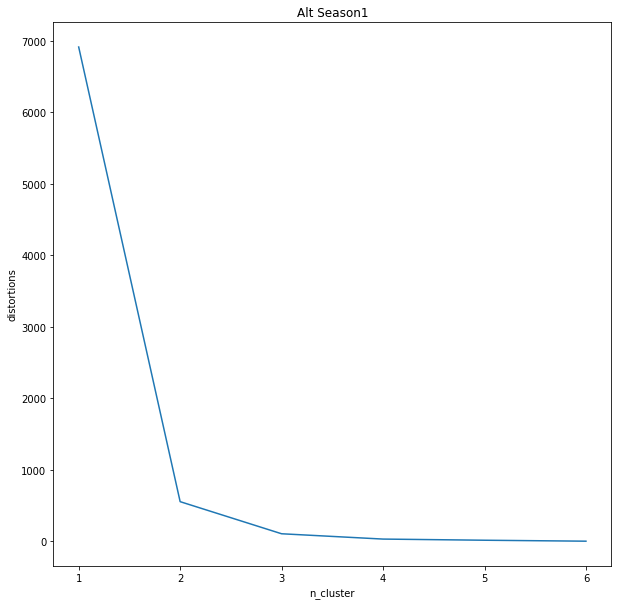

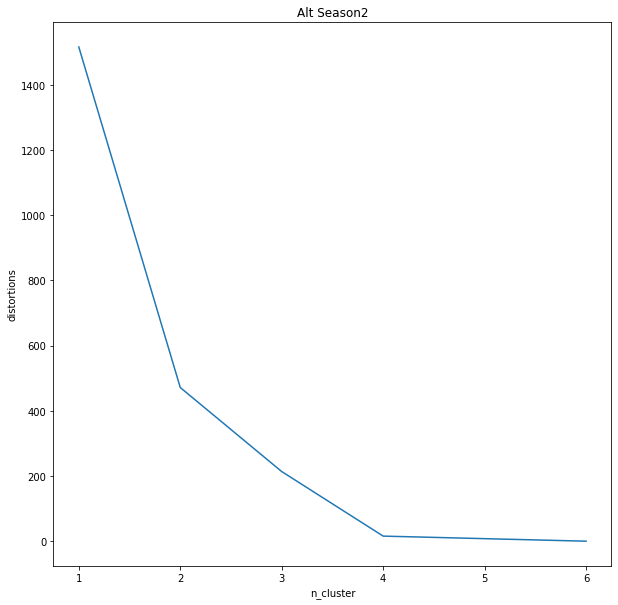

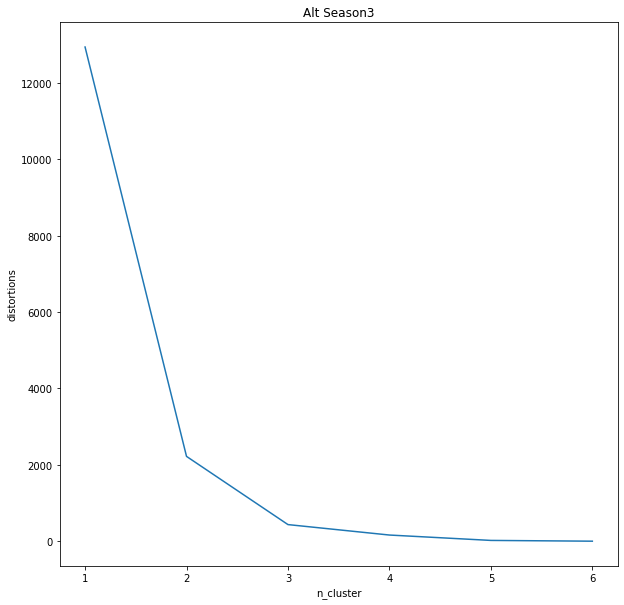

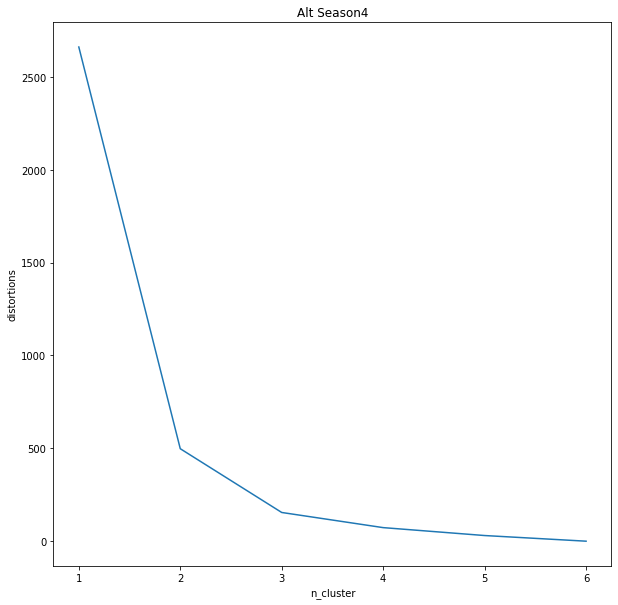

In [ ]:
#Elbow method sur les 4 dataframes pour savoir le nombre de clusters le plus optimale pour le K-Means 
#Alt Seson1 (20-21 Sept 2018)
k_range = range(1, 7)
distortions = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dfPourcentage[['Price', 'MC']])
    distortions.append(km.inertia_)
plt.xlabel('n_cluster')
plt.ylabel('distortions')
plt.plot(k_range, distortions)
plt.title('Alt Season1')
plt.show()

print(" ")

#Alt Seson2 (14-15 Mai 2019)
k_range = range(1, 7)
distortions = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dfPourcentage2[['Price', 'MC']])
    distortions.append(km.inertia_)
plt.xlabel('n_cluster')
plt.ylabel('distortions')
plt.plot(k_range, distortions)
plt.title('Alt Season2')
plt.show()

print(" ")

#Alt Seson3 (20-23 Nov 2020)
k_range = range(1, 7)
distortions = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dfPourcentage3[['Price', 'MC']])
    distortions.append(km.inertia_)
plt.xlabel('n_cluster')
plt.ylabel('distortions')
plt.plot(k_range, distortions)
plt.title('Alt Season3')
plt.show()

print(" ")

#Alt Seson4 (3-4 Janv 2021)
k_range = range(1, 7)
distortions = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dfPourcentage4[['Price', 'MC']])
    distortions.append(km.inertia_)
plt.xlabel('n_cluster')
plt.ylabel('distortions')
plt.plot(k_range, distortions)
plt.title('Alt Season4')
plt.show()

Grâce à l'Elbow method, j'ai pu identifier le nombre de cluster optimale à mettre en paramètres pour le K-means

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfPourcentage[['Price', 'MC']])
dfPourcentage['cluster'] = y_predicted

km2 = KMeans(n_clusters=4)
y_predicted2 = km2.fit_predict(dfPourcentage2[['Price', 'MC']])
dfPourcentage2['cluster'] = y_predicted2

km3= KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(dfPourcentage3[['Price', 'MC']])
dfPourcentage3['cluster'] = y_predicted3

km4= KMeans(n_clusters=3)
y_predicted4 = km4.fit_predict(dfPourcentage4[['Price', 'MC']])
dfPourcentage4['cluster'] = y_predicted4

In [ ]:
#Alt Seson1
def cluster_color(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    elif c== 2:
        return 'green'

dfPourcentage['cluster'] = dfPourcentage.cluster.map(cluster_color)

print(" ")

#Alt Seson2
def cluster_color2(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    elif c== 2:
        return 'green'
    else :
        return 'yellow'

dfPourcentage2['cluster'] = dfPourcentage2.cluster.map(cluster_color2)

print(" ")
#Alt Seson3
def cluster_color3(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    elif c== 2:
        return 'green'

dfPourcentage3['cluster'] = dfPourcentage3.cluster.map(cluster_color3)

print(" ")

#Alt Seson4
def cluster_color4(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    elif c== 2:
        return 'green'

dfPourcentage4['cluster'] = dfPourcentage4.cluster.map(cluster_color4)

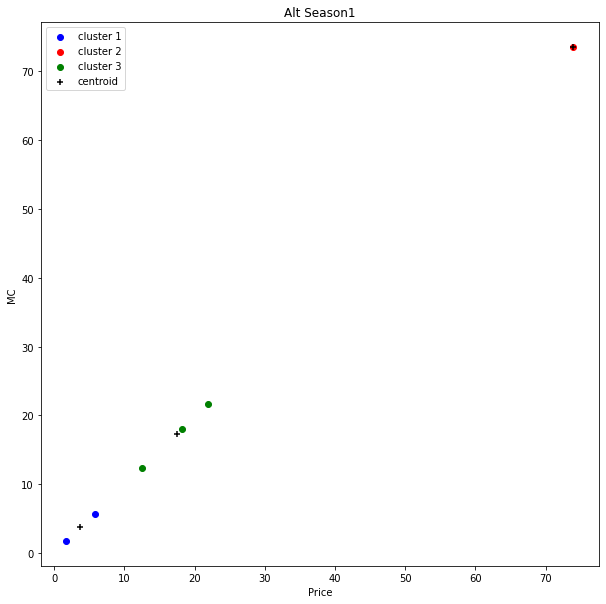

,Name,Price,MC,cluster
0,BTC,5.773610,5.736849,blue
1,ETH,18.153007,18.023556,green
2,XRP,73.954978,73.515703,red
3,DOGE,1.718514,1.752563,blue
4,ADA,21.872403,21.607354,green
5,LTC,12.487471,12.407834,green


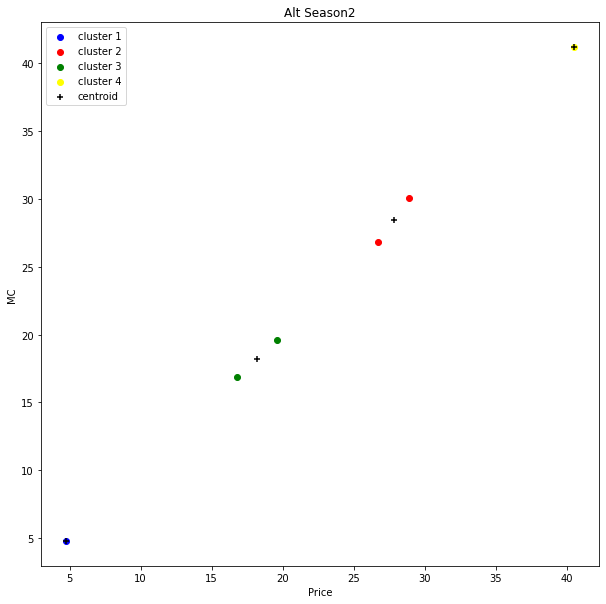

,Name,Price,MC,cluster
0,BTC,4.771214,4.760323,blue
1,ETH,26.693457,26.859478,red
2,XRP,40.471534,41.222748,yellow
3,DOGE,19.591972,19.604855,green
4,ADA,28.919131,30.104651,red
5,LTC,16.763269,16.835846,green


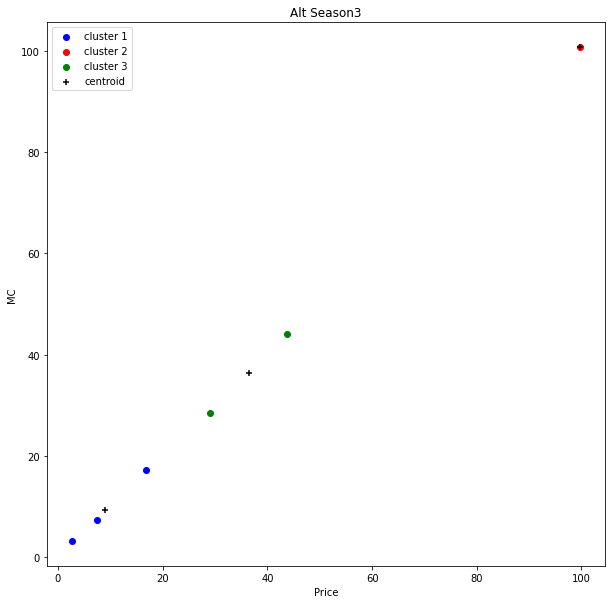

,Name,Price,MC,cluster
0,BTC,2.766680,3.140946,blue
1,ETH,29.057953,28.546746,green
2,XRP,99.658607,100.808474,red
3,DOGE,16.774841,17.101148,blue
4,ADA,43.798120,44.163622,green
5,LTC,7.462615,7.402685,blue


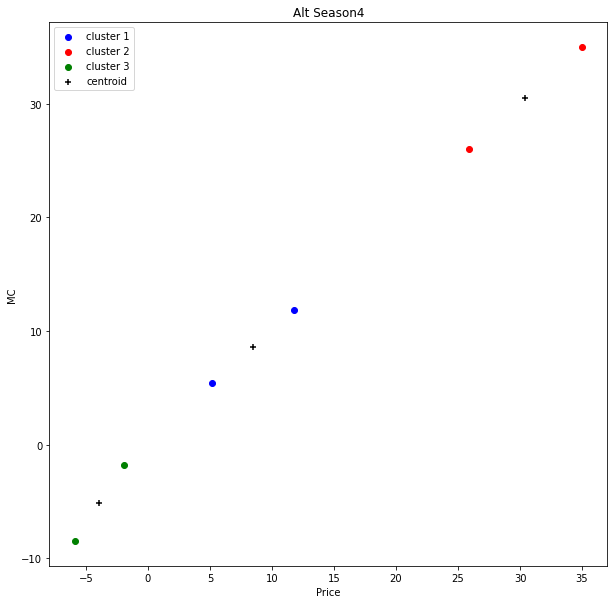

,Name,Price,MC,cluster
0,BTC,-1.921114,-1.799747,green
1,ETH,34.983290,35.015108,red
2,XRP,5.143028,5.430811,blue
3,DOGE,-5.914539,-8.496371,green
4,ADA,25.881631,26.055815,red
5,LTC,11.813027,11.812477,blue


In [ ]:
#Alt Seson1
cluster0 = dfPourcentage[dfPourcentage.cluster == 'blue']
cluster1 = dfPourcentage[dfPourcentage.cluster == 'red']
cluster2 = dfPourcentage[dfPourcentage.cluster == 'green']

plt.scatter(cluster0.Price, cluster0.MC, color='blue', label='cluster 1')
plt.scatter(cluster1.Price, cluster1.MC, color='red', label='cluster 2')
plt.scatter(cluster2.Price, cluster2.MC, color='green', label='cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='+', label='centroid')

plt.xlabel('Price')
plt.ylabel('MC')
plt.title('Alt Season1')

plt.legend()
plt.show()
display(dfPourcentage)

print(" ")

#Alt Seson2
cluster0 = dfPourcentage2[dfPourcentage2.cluster == 'blue']
cluster1 = dfPourcentage2[dfPourcentage2.cluster == 'red']
cluster2 = dfPourcentage2[dfPourcentage2.cluster == 'green']
cluster3 = dfPourcentage2[dfPourcentage2.cluster == 'yellow']

plt.scatter(cluster0.Price, cluster0.MC, color='blue', label='cluster 1')
plt.scatter(cluster1.Price, cluster1.MC, color='red', label='cluster 2')
plt.scatter(cluster2.Price, cluster2.MC, color='green', label='cluster 3')
plt.scatter(cluster3.Price, cluster3.MC, color='yellow', label='cluster 4')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],  color='black', marker='+', label='centroid')

plt.xlabel('Price')
plt.ylabel('MC')
plt.title('Alt Season2')

plt.legend()
plt.show()
display(dfPourcentage2)

print(" ")


#Alt Seson3 
cluster0 = dfPourcentage3[dfPourcentage3.cluster == 'blue']
cluster1 = dfPourcentage3[dfPourcentage3.cluster == 'red']
cluster2 = dfPourcentage3[dfPourcentage3.cluster == 'green']

plt.scatter(cluster0.Price, cluster0.MC, color='blue', label='cluster 1')
plt.scatter(cluster1.Price, cluster1.MC, color='red', label='cluster 2')
plt.scatter(cluster2.Price, cluster2.MC, color='green', label='cluster 3')

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], color='black', marker='+', label='centroid')

plt.xlabel('Price')
plt.ylabel('MC')
plt.title('Alt Season3')

plt.legend()
plt.show()
display(dfPourcentage3)

print(" ")

#Alt Seson4
cluster0 = dfPourcentage4[dfPourcentage4.cluster == 'blue']
cluster1 = dfPourcentage4[dfPourcentage4.cluster == 'red']
cluster2 = dfPourcentage4[dfPourcentage4.cluster == 'green']

plt.scatter(cluster0.Price, cluster0.MC, color='blue', label='cluster 1')
plt.scatter(cluster1.Price, cluster1.MC, color='red', label='cluster 2')
plt.scatter(cluster2.Price, cluster2.MC, color='green', label='cluster 3')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], color='black', marker='+', label='centroid')

plt.xlabel('Price')
plt.ylabel('MC')
plt.title('Alt Season4')

plt.legend()
plt.show()
display(dfPourcentage4)

Grâce au K-means sur les 4 ALt Season, j'ai pu identifer plusieurs clusteurs. Génerallement le XRP est la crypto qui performe le plus lors d'une alt season. ETH et ADA ont des performances également élévées. Cependant, je remarque que le LTC et le DOGE ont des performance plus proche de celle du BTC

# **Moyenne**

Pour confirmer les hypothèses faites ci-dessus, je décide de créer un dataframe représentant la moyenne de hausse sur les 6 cryptos lors des 4 AltsSeasons. Cela nous permettra de savoir les cryptos les plus intéressantes à avoir lors d'une Alt Seasons.

In [ ]:
#Créer un dataframe pour pouvoir calculer la moyenne d'évolution des cryptos sur ces 4 AltSeasons pour en tirer des conclusions
dfPourcentageGlobal = pd.DataFrame(list(zip(ListName,listPourcentagePrice, listPourcentagePrice2, listPourcentagePrice3 ,listPourcentagePrice4, listPourcentageMC, listPourcentageMC2, listPourcentageMC3,listPourcentageMC4)), columns = ['Name', 'Price1', 'Price2', 'Price3', 'Price4', 'MC1', 'MC2', 'MC3', 'MC4'])
dfPourcentageGlobal
dfPourcentageGlobal.to_csv('PourcentageGlobal.csv')

listPriceBTC = [listPourcentagePrice[0], listPourcentagePrice2[0], listPourcentagePrice3[0],listPourcentagePrice4[0]]
listPriceETH = [listPourcentagePrice[1], listPourcentagePrice2[1], listPourcentagePrice3[1],listPourcentagePrice4[1]]
listPriceXRP = [listPourcentagePrice[2], listPourcentagePrice2[2], listPourcentagePrice3[2],listPourcentagePrice4[2]]
listPriceDOGE = [listPourcentagePrice[3], listPourcentagePrice2[3], listPourcentagePrice3[3],listPourcentagePrice4[3]]
listPriceADA = [listPourcentagePrice[4], listPourcentagePrice2[4], listPourcentagePrice3[4],listPourcentagePrice4[4]]
listPriceLTC = [listPourcentagePrice[5], listPourcentagePrice2[5], listPourcentagePrice3[5],listPourcentagePrice4[5]]

listMCBTC = [listPourcentageMC[0], listPourcentageMC2[0], listPourcentageMC3[0],listPourcentageMC4[0]]
listMCETH = [listPourcentageMC[1], listPourcentageMC2[1], listPourcentageMC3[1],listPourcentageMC4[1]]
listMCXRP = [listPourcentageMC[2], listPourcentageMC2[2], listPourcentageMC3[2],listPourcentageMC4[2]]
listMCDOGE = [listPourcentageMC[3], listPourcentageMC2[3], listPourcentageMC3[3],listPourcentageMC4[3]]
listMCADA = [listPourcentageMC[4], listPourcentageMC2[4], listPourcentageMC3[4],listPourcentageMC4[4]]
listMCLTC = [listPourcentageMC[5], listPourcentageMC2[5], listPourcentageMC3[5],listPourcentageMC4[5]]



meanPriceBTC = statistics.mean(listPriceBTC)
meanPriceETH = statistics.mean(listPriceETH)
meanPriceXRP = statistics.mean(listPriceXRP)
meanPriceDOGE = statistics.mean(listPriceDOGE)
meanPriceADA = statistics.mean(listPriceADA)
meanPriceLTC = statistics.mean(listPriceLTC)
listeMeanPrice = [meanPriceBTC, meanPriceETH, meanPriceXRP, meanPriceDOGE, meanPriceADA, meanPriceLTC]


meanMCBTC = statistics.mean(listMCBTC)
meanMCETH = statistics.mean(listMCETH)
meanMCXRP = statistics.mean(listMCXRP)
meanMCDOGE = statistics.mean(listMCDOGE)
meanMCADA = statistics.mean(listMCADA)
meanMCLTC = statistics.mean(listMCLTC)
listeMeanMC = [meanMCBTC, meanMCETH, meanMCXRP, meanMCDOGE, meanMCADA, meanMCLTC]

dfPourcentageMeans = pd.DataFrame(list(zip(ListName,listeMeanPrice, listeMeanMC)), columns = ['Name', 'Means_Price', 'Means_MC'])
dfPourcentageMeans
dfPourcentageMeans.to_csv('PourcentageMeans.csv')


Text(0.5, 1.0, 'Means 4 AltSeasons')

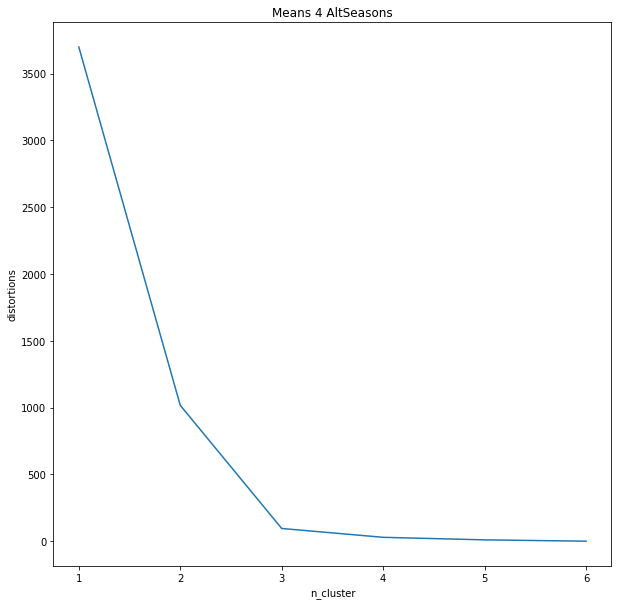

In [ ]:
#Elbow method
k_range = range(1, 7)
distortions = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dfPourcentageMeans[['Means_Price', 'Means_MC']])
    distortions.append(km.inertia_)
plt.xlabel('n_cluster')
plt.ylabel('distortions')
plt.plot(k_range, distortions)
plt.title('Means 4 AltSeasons')

In [ ]:
kmMeans= KMeans(n_clusters=3)
y_predictedMeans = kmMeans.fit_predict(dfPourcentageMeans[['Means_Price', 'Means_MC']])
dfPourcentageMeans['cluster'] = y_predictedMeans

In [ ]:
def cluster_colorMeans(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    elif c== 2:
        return 'green'

dfPourcentageMeans['cluster'] = dfPourcentageMeans.cluster.map(cluster_colorMeans)

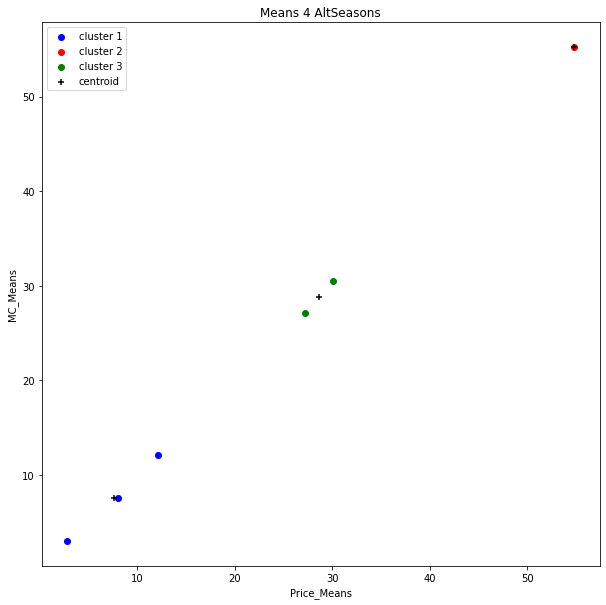

,Name,Means_Price,Means_MC,cluster
0,BTC,2.847598,2.959593,blue
1,ETH,27.221927,27.111222,green
2,XRP,54.807037,55.244434,red
3,DOGE,8.042697,7.490549,blue
4,ADA,30.117821,30.482861,green
5,LTC,12.131595,12.114711,blue


In [ ]:
cluster0 = dfPourcentageMeans[dfPourcentageMeans.cluster == 'blue']
cluster1 = dfPourcentageMeans[dfPourcentageMeans.cluster == 'red']
cluster2 = dfPourcentageMeans[dfPourcentageMeans.cluster == 'green']

plt.scatter(cluster0.Means_Price, cluster0.Means_MC, color='blue', label='cluster 1')
plt.scatter(cluster1.Means_Price, cluster1.Means_MC, color='red', label='cluster 2')
plt.scatter(cluster2.Means_Price, cluster2.Means_MC, color='green', label='cluster 3')

plt.scatter(kmMeans.cluster_centers_[:,0], kmMeans.cluster_centers_[:,1], color='black', marker='+', label='centroid')

plt.xlabel('Price_Means')
plt.ylabel('MC_Means')
plt.title('Means 4 AltSeasons')

plt.legend()
plt.show()
display(dfPourcentageMeans)

# **Conclusion**

Grâce ce dernier dataframe, mes observations sont confimées. En effet, lors d'une AltSeason les cryptos les plus importantes à avoir sont XRP, ETH et ADA.

Bien évidement, nous ne pouvons pas anticiper une AltSeason. De plus, les performances de ces 4 dernières années ne nous garantissent pas les performances des prochaines années.

Cependant, cette étude nous montre qu'il est intérressant d'avoir dans sont portefeuille du XRP, ETH et ADA pour pouvoir superformer le BTC lors d'AltSeason.

Ainsi, grâce à ce projet de Machine Learning, je peux établir une stratégie me permmettant de gagner plus de BTC sur le long terme en tradant que la paire ALT/BTC. L'idée serait d'investir un % de mon portefeuille crypto sur XRP, ETH et ADA pour pouvoir superformer le BTC lors d'AltSeaons. Grâce à ce projet, je peux ainsi savoir que lorsqu'il y a une AltSeason, ou que l'on commence à avoir une superformance des Alts, il est intérressant de vendre ces 3 cryptos  par rapport à la paire BTC en DCA (palier par palier) pour avoir plus de BTC après cette péridoe. Par la suite, une fois que le BTC superforme à nouveaux les Alts je pourrais racheter mes Alts moins chères par rapports au BTC. 

Ainsi, en faisant cela plusieurs fois mon nombre de BTC augementera avec le temps. En espérant que par la suite la paire BTC/USD augemente lors du prochain bull run pour avoir plus de dollars ! 🚀🚀🚀🚀🚀🚀🚀🚀🚀